In [1]:
from fastbook import *

In [18]:
urls = search_images_ddg('bird photos', max_images=1)
urls[0]

'http://1.bp.blogspot.com/-dX26U90Vlyc/UG6zQT_1dHI/AAAAAAAAAv0/7nmRCHoab0g/s1600/Parrot+wallpaper+2012+01.jpg'

In [19]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

HTTPError: HTTP Error 503: Service Unavailable
====Error Body====
<html>
<meta http-equiv="content-type" content="text/html; charset=UTF-8"
<head>
<title>Страница заблокирована!</title>
<style>
body{
background:#fff;
font-family:Helvetica,Tahoma,sans-serif;
font-size:14px;
padding:40;}
div#content{ 
margin:15px;
background:#CFDD9C;
font-family:Helvetica,Tahoma,Arial,sans-serif;
font-size:14px;}
h1{
font-size:20px;
font-weight:bold;color:#196390;
margin: 20px;}
b{
font-weight:bold;
color:#196390;}
p{
margin:20px;}
b.rtop, b.rbottom{display:block; background: #fff;}
b.rtop b, b.rbottom b{display: block; height: 1px; overflow: hidden;
background: #CFDD9C;}
b.r1{margin: 0 5px}
b.r2{margin: 0 3px}
b.r3{margin: 0 2px}
b.r4{margin: 0 1px; height: 2px}
</style>
</head>
<script>
function validateForm()
{
var x=document.forms["sf"]["comments"].value;
if (x==null || x=="")
  {
  alert("Необходимо заполнить поле Комментарий!");
  return false;
  }
}
</script>
<body bgcolor="#e7e8e9">
<table>
<tr><td><img src="http://10.10.40.50/palo/Stop-Sign.gif"></td>
<td>
<div id="content">
<b class="rtop"><b class="r1"></b><b class="r2"></b>
<b class="r3"></b><b class="r4"></b></b>
<h1>Заблокировано!</h1>
<p>Доступ к данной странице был заблокирован политикой компании.</p>
<p><b>Пользователь:</b> partner\tretyakov.aa </p>
<p><b>URL:</b> 1.bp.blogspot.com/-dX26U90Vlyc/UG6zQT_1dHI/AAAAAAAAAv0/7nmRCHoab0g/s1600/Parrot+wallpaper+2012+01.jpg </p>
<p><b>Категория:</b> personal-sites-and-blogs </p>
<b class="rbottom"><b class="r4"></b><b class="r3"></b>
<b class="r2"></b><b class="r1"></b></b>
</div>
</td></tr>
<tr><td></td><td>
<form name=sf method="post" action="http://10.10.40.50/palo/email.php" onsubmit="return validateForm()">
<p>Если вы считаете, что этот сайт нужен вам для работы, то свяжитесь с нами через данную форму.</p><br>

<p><b>Поле комментарий должно содержать краткую причину того, почему заблокированый сайт необходим для работы.</b></p>
<p><b>Будут игнорироваться следующие запросы на добавление:</b></p>
<p>1. Не содержащие смысловой нагрузки</p>
<p>2. Не относящиеся к сфере работы компании, либо к деятельности кредитных экспертов</p>
<p>3. Содержащие ссылки на контрафактное или вредоносное ПО</p>
<p>4. Содержащие непрямые ссылки на поисковик, в котором вбит нужный сайт</p>
<p>5. Содержащие ссылки на сайты откровенного содержания, развлекательные, знакомств и тп. (данный комментарий будет перенаправлен региональному руководству, со всеми вытекающими)</p>

<p><b>Комментарий: </b><br>
<textarea cols="50" rows="4" name="comments"></textarea><br>
<input type=hidden name="rulename" value="ADM-users-networks_to_INET">
<input type=hidden name="url" value="1.bp.blogspot.com/-dX26U90Vlyc/UG6zQT_1dHI/AAAAAAAAAv0/7nmRCHoab0g/s1600/Parrot+wallpaper+2012+01.jpg">
<input type=hidden name="user" value="partner\tretyakov.aa">
<input type=hidden name="category" value="personal-sites-and-blogs">
<input type=submit value="Отправить"></p>
</form>
</td></tr>
</table>
</body>
</html>


In [20]:
im = Image.open(dest)
im.to_thumb

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Tretyakov.AA\\Desktop\\projects_repositories\\deep_learning_github\\deep_learning_kvinslend\\part 1\\bird.jpg'

In [22]:
results = search_images_ddg(f'forest photo')

In [2]:
path = Path('bird_or_not')

In [4]:
searches = ['forest', 'bird']
path = Path('bird_or_not')

for o in ['forest']:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls = results[:200])
    resize_images(dest, max_size = 400, dest = dest)

In [5]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#14) [None,None,None,None,None,None,None,None,None,None...]

c:\Users\Tretyakov.AA\Desktop\projects_repositories\deep_learning_github\deep_learning_kvinslend\.venv\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


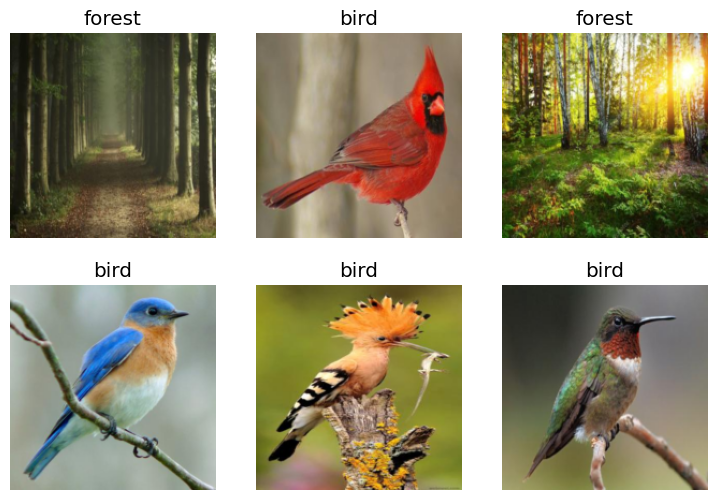

In [6]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = 'squish')]
).dataloaders(path)
dls.show_batch(max_n = 6)

In [7]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(3)

c:\Users\Tretyakov.AA\Desktop\projects_repositories\deep_learning_github\deep_learning_kvinslend\.venv\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.001066,1.081566,0.416667,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.104367,0.774429,0.291667,00:02
1,0.900090,0.438360,0.166667,00:02
2,0.698011,0.240080,0.083333,00:02


In [10]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f'This is a: {is_bird}.')
print(f'Probability it`s a bird: {probs[0]: .4f}')

FileNotFoundError: [Errno 2] No such file or directory: 'bird.jpg'